<a href="https://colab.research.google.com/github/badriplot/deep-learning-/blob/master/churn_modeling_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [0]:
import pandas as pd

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

In [0]:
X= df2.iloc[:, 3:13]
y= df2.iloc[:, 13]

In [0]:
#create dummy variables

In [0]:
geography =pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [0]:
#concatenate rge data frames

In [0]:
X=pd.concat([X,geography,gender],axis=1)

In [0]:
# drop unneccessary columns

In [0]:
X= X.drop(['Geography','Gender'],axis=1)

In [0]:
#splitting the dataset into the training set and test set

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [0]:
#feature scaling 

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc= StandardScaler()

In [0]:
X_train = sc.fit_transform(X_train)

In [0]:
X_test = sc.transform(X_test)

In [0]:
#part 2 - now lets make the ANN 

In [26]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense

In [0]:
from keras.layers import LeakyReLU,PReLU,ELU

In [0]:
from keras.layers import Dropout

In [0]:
#INITIALISING THE ANN 

In [0]:
classifier = Sequential()

In [0]:
#ADDING INPUT LAYER AND FIRST HIDDEN LAYER 

In [0]:
classifier.add(Dense(units= 6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [0]:
#adding the second hidden layer 

In [0]:
classifier.add(Dense(units= 6,kernel_initializer='he_uniform',activation='relu'))

In [0]:
#adding the output layer 

In [0]:
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform',activation='sigmoid'))

In [44]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compiling the ANN 

In [0]:
classifier.compile(optimizer='adam',loss ='binary_crossentropy',metrics =['accuracy'])

In [0]:
#fitting the ANN to the training set 

In [48]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,nb_epoch=100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 215us/step - loss: 0.6451 - accuracy: 0.6680 - val_loss: 0.4979 - val_accuracy: 0.8005
Epoch 2/100
5359/5359 [==============================] - 1s 150us/step - loss: 0.4720 - accuracy: 0.8013 - val_loss: 0.4614 - val_accuracy: 0.8020
Epoch 3/100
5359/5359 [==============================] - 1s 144us/step - loss: 0.4388 - accuracy: 0.8091 - val_loss: 0.4397 - val_accuracy: 0.8023
Epoch 4/100
5359/5359 [==============================] - 1s 144us/step - loss: 0.4168 - accuracy: 0.8136 - val_loss: 0.4223 - val_accuracy: 0.8035
Epoch 5/100
5359/5359 [==============================] - 1s 146us/step - loss: 0.3980 - accuracy: 0.8214 - val_loss: 0.4048 - val_accuracy: 0.8111
Epoch 6/100
5359/5359 [==============================] - 1s 166us/step - loss: 0.3816 - accuracy: 0.8294 - val_loss: 0.3910 - val_accuracy: 0.8183
Epoch 7/100
5359/5359 [==============================] - 1s 143us/step

In [0]:
#list all data in history 

In [50]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [0]:
#summarize history for accuracy 

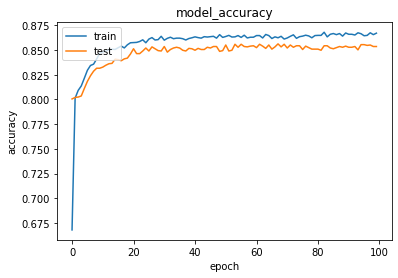

In [57]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [0]:
#predicitng the test set results

In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5 )

In [0]:
#making confusion matrix 

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [0]:
#calculate the acuracy

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
score=accuracy_score(y_pred,y_test)

In [66]:
score

0.8625